In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
 train_labels = pd.read_csv('../datasets/train_labels.csv')

In [3]:
 train_values = pd.read_csv('../datasets/train_values.csv')

In [4]:
edificación_construida_con_adobe = train_values.loc[train_values['has_superstructure_adobe_mud']==1,'building_id']

In [5]:
grado_danio_edificación_construida_con_adobe = train_labels.merge(edificación_construida_con_adobe, how='inner')

In [6]:
grado_danio_edificación_construida_con_adobe = grado_danio_edificación_construida_con_adobe.groupby('damage_grade')\
    .agg('count').reset_index().rename(columns={'building_id':'cantidad_de_edificacion_de_adobe'})

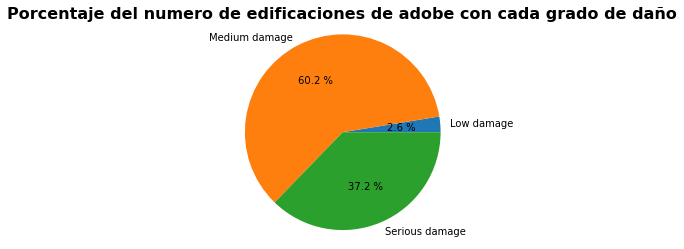

In [7]:
damage_grade=['Low damage','Medium damage','Serious damage']
plt.title('Porcentaje del numero de edificaciones de adobe con cada grado de daño', fontsize=16, fontweight='bold')
plt.pie(grado_danio_edificación_construida_con_adobe['cantidad_de_edificacion_de_adobe'], labels=damage_grade,autopct="%0.1f %%")
plt.axis("equal")
plt.show()

In [8]:
grado_danio_edificación_construida_con_adobe['damage_grade'] = pd.Categorical(grado_danio_edificación_construida_con_adobe['damage_grade'])

In [9]:
grado_danio_edificación_construida_con_adobe = grado_danio_edificación_construida_con_adobe.set_index('damage_grade')
damage_grade = {1:'Low damage',2:'Medium damage', 3:'Serious damage'}
grado_danio_edificación_construida_con_adobe = grado_danio_edificación_construida_con_adobe.rename(index=damage_grade)

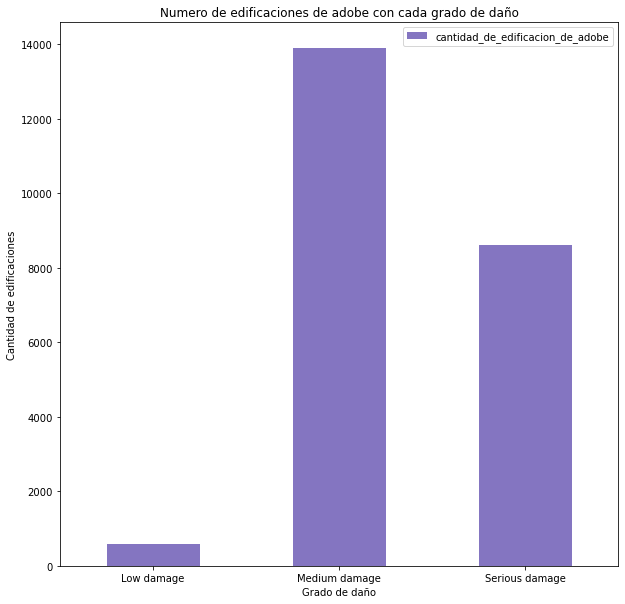

In [10]:
grado_danio_edificación_construida_con_adobe.plot(kind='bar',figsize=(10,10),rot=0,\
    title='Numero de edificaciones de adobe con cada grado de daño',color=(0.2, 0.1, 0.6, 0.6))
ax=plt.gca()
ax.set_xlabel('Grado de daño')
ax.set_ylabel('Cantidad de edificaciones');